In [12]:
from keras.datasets import mnist
#from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import os

In [4]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print("학습셋 이미지 수: %d 개" %(X_train.shape[0]))
print("테스트셋 이미지 수: %d 개" %(X_test.shape[0]))

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')  / 255


학습셋 이미지 수: 60000 개
테스트셋 이미지 수: 10000 개


In [5]:
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [6]:
model = Sequential()
model.add(Dense(512, input_dim = 784, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [17]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss',
                               verbose = 1, save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test),
                    epochs = 30, batch_size = 200, verbose = 0,
                    callbacks = [early_stopping_callback, checkpointer])

print("\n Test Accuracy: %.4f" %(model.evaluate(X_test, Y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']




Epoch 00001: val_loss improved from inf to 0.08733, saving model to ./model\01-0.0873.hdf5

Epoch 00002: val_loss did not improve from 0.08733

Epoch 00003: val_loss did not improve from 0.08733

Epoch 00004: val_loss improved from 0.08733 to 0.08600, saving model to ./model\04-0.0860.hdf5

Epoch 00005: val_loss did not improve from 0.08600

Epoch 00006: val_loss improved from 0.08600 to 0.08365, saving model to ./model\06-0.0837.hdf5

Epoch 00007: val_loss did not improve from 0.08365

Epoch 00008: val_loss did not improve from 0.08365

Epoch 00009: val_loss did not improve from 0.08365

Epoch 00010: val_loss did not improve from 0.08365

Epoch 00011: val_loss did not improve from 0.08365

Epoch 00012: val_loss did not improve from 0.08365

Epoch 00013: val_loss did not improve from 0.08365

Epoch 00014: val_loss did not improve from 0.08365

Epoch 00015: val_loss did not improve from 0.08365

Epoch 00016: val_loss did not improve from 0.08365
313/313 [==============================]

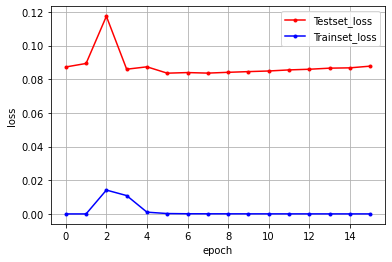

In [19]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()